In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import plotnine as p9
import seaborn as sns
import scipy.stats

In [2]:
def standard_normal(x):
    return (1/np.sqrt(2*np.pi)) * np.exp((-1/2) * (x**2)) 

In [3]:
def normal(mu,sigma_sq,x):
    sigma = np.sqrt(sigma_sq)
    return (1/sigma) * standard_normal((x-mu)/sigma)

In [71]:
def make_normal_xy(mean,sigma_sq,num_devs,num_samples,grains,epsilon):
    """
    Args:
      - mean,sigma_sq define our normal distribution 
      - num_dev is the number of standard deviations from which we'll define the plot
      - num_samples is the number of samples we'll make
      - grains is the number of subdivisions we'll use to define our curve
      - epsilon defines our 1-epsilon confidence region.  We then keep all values in this region. 
    Return:
      - x,y,samples
      - x is the subdivided x axis for the plot
      - y is the image of x under the normal distribution
      - samples is the samples from the normal distribution
    """
    spread = sigma_sq*num_devs
    x=np.linspace(start=mean-spread,stop=mean+spread,num=grains)
    y=normal(mean,sigma_sq=sigma_sq,x=x)
    samples = np.random.normal(loc=mean,scale=sigma_sq,size=num_samples)
    cilower,ciupper= scipy.stats.norm.interval(1-epsilon,loc=mean,scale=sigma_sq)
    samples = samples[samples >= cilower]
    samples = samples[samples <= ciupper]

    return (x,y,samples)


In [286]:

num_samples=1_000
num_grains=1_000
num_dev=3
epsilon=0.2
mu1,mu2,mu3 = 0,1.2,6.5
std1=std2=std3=1
x1,y1,samples1 = make_normal_xy(mu1,std1,num_devs=num_dev,num_samples=num_samples,grains=num_grains,epsilon=epsilon)
x2,y2,samples2=make_normal_xy(mu2,std2,num_devs=num_dev,num_samples=num_samples,grains=num_grains,epsilon=epsilon)
x3,y3,samples3=make_normal_xy(mu3,std3,num_devs=num_dev,num_samples=num_samples,grains=num_grains,epsilon=epsilon)


In [287]:
# make the dataframe for the lineplots
df_line = pd.concat(
    [
        pd.DataFrame({'x':x1,'y':y1,"mu":np.repeat(0,x1.shape[0]),"color_code":np.repeat(0,x1.shape[0])}),
        pd.DataFrame({'x':x2,'y':y2,"mu":np.repeat(1,x2.shape[0]),"color_code":np.repeat(2,x2.shape[0])}),
        pd.DataFrame({'x':x3,'y':y3,"mu":np.repeat(2,x3.shape[0]),"color_code":np.repeat(3,x3.shape[0])}),
        pd.DataFrame({'x':[x1[0]],'y':[y1[0]],'mu':[mu1],"color_code":[1]})
    ]
)
# make the dataframe for the scatter plots
df_bar = pd.concat(
    [
        pd.DataFrame({'sample':samples1,'height':np.repeat(0,samples1.shape[0]),"color_code":np.repeat(0,samples1.shape[0])}),
        pd.DataFrame({'sample':samples2,'height':np.repeat(0,samples2.shape[0]),"color_code":np.repeat(2,samples2.shape[0])}),
        pd.DataFrame({'sample':samples3,'height':np.repeat(0,samples3.shape[0]),"color_code":np.repeat(3,samples3.shape[0])})
    ]
)
# df_bar["color_code"] = df_bar["mu"]


In [288]:
# to exemplify the blending, we modify the color of those items that fall in the overlap region
# have the blended color
largest_s1=np.max(samples1)
smallest_s2 =np.min(samples2)
df_bar.loc[df_bar.eval('color_code==0 and sample >= {}'.format(smallest_s2)),"color_code"] = 1
df_bar.loc[df_bar.eval('color_code==2 and sample <= {}'.format(largest_s1)),"color_code"] = 1

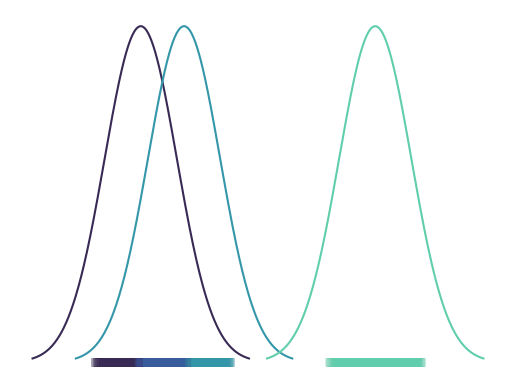

In [301]:
# set up area for the plots
fig,ax= plt.subplots()
# 
# [c1,c2,c3]
sns.lineplot(data=df_line,x="x",y="y",hue="color_code",ax=ax,palette=sns.color_palette("mako",4))
sns.scatterplot(data=df_bar,x="sample",y="height",alpha=0.05,marker="s",edgecolor=None,hue="color_code",ax=ax,palette=sns.color_palette("mako",4))

# plot shaping
sns.despine(fig,ax,bottom=True,left=True,top=True,right=True)
ax.set(xticklabels=[])
ax.set(yticklabels=[])
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.get_legend().set_visible(False)


In [303]:
fig.savefig("normal_separation.svg")